# 《2022年普通高校研究生人数》相关数据分析

## 一、数据来源

 数据来源于中华人民共和国教育部政府门户网站-2022年教育统计数据，为了数据导入时的可读性，根据原数据格式略加修改

## 二、分析内容

 探索普通高校研究生数量的地区、性别差异，推断未来高校研究生人数及性别差异的发展趋势

## 三、分析思路

 数据读取与清理 → 数据可视化探索 → 若干假设统计检验分析 → 得出结论

## 四、分析流程

### （一）数据读取与清理

#### 1.数据读取

In [1]:
import pandas as pd

In [2]:
master_2022 = pd.read_csv(r"C:\Users\52699\Desktop\数据集\教育数据相关\2022普通高校研究生数.csv",encoding = 'GBK')

In [3]:
master_2022.head()

,地区,毕业生数,女毕业生,男毕业生,毕业博士,毕业硕士,招生数,招入女学生,招入男学生,招入博士,...,在校生数,女在校生,男在校生,在校博士,在校硕士,预计毕业生数,女准毕业生,男准毕业生,准毕业博士,准毕业硕士
0,北 京,116747,61254,55493,22421,94326,150514,76176,74338,32642,...,448426,219322,229104,131524,316902,164804,81779,83025,46668,118136
1,天 津,23967,13977,9990,2376,21591,31575,17404,14171,4038,...,92726,49453,43273,15675,77051,32329,17857,14472,5239,27090
2,河 北,19313,11218,8095,683,18630,28883,15654,13229,1357,...,81824,44034,37790,5392,76432,27441,14743,12698,2167,25274
3,山 西,14050,8372,5678,581,13469,20078,11290,8788,1151,...,55379,30870,24509,4272,51107,18214,10360,7854,1853,16361
4,内蒙古,9415,5897,3518,338,9077,13526,7917,5609,608,...,37588,21812,15776,2486,35102,14285,8558,5727,1283,13002


In [4]:
master_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   地区      31 non-null     object
 1   毕业生数    31 non-null     int64 
 2   女毕业生    31 non-null     int64 
 3   男毕业生    31 non-null     int64 
 4   毕业博士    31 non-null     int64 
 5   毕业硕士    31 non-null     int64 
 6   招生数     31 non-null     int64 
 7   招入女学生   31 non-null     int64 
 8   招入男学生   31 non-null     int64 
 9   招入博士    31 non-null     int64 
 10  招入硕士    31 non-null     int64 
 11  在校生数    31 non-null     int64 
 12  女在校生    31 non-null     int64 
 13  男在校生    31 non-null     int64 
 14  在校博士    31 non-null     int64 
 15  在校硕士    31 non-null     int64 
 16  预计毕业生数  31 non-null     int64 
 17  女准毕业生   31 non-null     int64 
 18  男准毕业生   31 non-null     int64 
 19  准毕业博士   31 non-null     int64 
 20  准毕业硕士   31 non-null     int64 
dtypes: int64(20), object(1)
memory usage: 5.2+ KB


#### 2.数据清理与整理

    根据前期的数据读取结果，发现当前数据格式为宽格式。<br><br>为方便后续的可视化分析和统计假设检验，在此步骤根据学生性质、不同性质下的性别和学历层次拆分表格，并将据转换为长格式。

##### （1）学生性质（毕业生、招生、在校生、预计毕业生）表

In [5]:
master_state = master_2022[['地区','毕业生数','招生数','在校生数','预计毕业生数']]
master_state.columns = ['地区','毕业生','招入学生','在校生','预计毕业生']
master_state = master_state.melt(id_vars = '地区',var_name = '学生性质',value_name = '人数')

##### （2）毕业生的性别、学历层次表

In [6]:
# 毕业生性别表
graduated_sex = master_2022[['地区','女毕业生','男毕业生']]
graduated_sex.columns = ['地区','女','男']
graduated_sex = graduated_sex.melt(id_vars = '地区',var_name = '性别',value_name = '人数')

In [7]:
# 毕业生学历层次表
graduated_degree = master_2022[['地区','毕业博士','毕业硕士']]
graduated_degree.columns = ['地区','博士','硕士']
graduated_degree = graduated_degree.melt(id_vars = '地区',var_name = '学历层次',value_name = '人数')

##### （3）招入学生的性别、学历层次表

In [8]:
# 招入学生性别表
enroll_sex = master_2022[['地区','招入女学生','招入男学生']]
enroll_sex.columns = ['地区','女','男']
enroll_sex = enroll_sex.melt(id_vars = '地区',var_name = '性别',value_name = '人数')

In [9]:
# 招入学生学历层次表
enroll_degree = master_2022[['地区','招入博士','招入硕士']]
enroll_degree.columns = ['地区','博士','硕士']
enroll_degree = enroll_degree.melt(id_vars = '地区',var_name = '学历层次',value_name = '人数')

##### （4）在校学生的性别、学历层次表

In [10]:
# 在校学生性别表
in_sex = master_2022[['地区','女在校生','男在校生']]
in_sex.columns = ['地区','女','男']
in_sex = in_sex.melt(id_vars = '地区',var_name = '性别',value_name = '人数')

In [11]:
# 在校学生学历层次表
in_degree = master_2022[['地区','在校博士','在校硕士']]
in_degree.columns = ['地区','博士','硕士']
in_degree = in_degree.melt(id_vars = '地区',var_name = '学历层次',value_name = '人数')

##### （5）预计毕业生的性别、学历层次表

In [12]:
# 预计毕业生性别表
undergraduated_sex = master_2022[['地区','女准毕业生','男准毕业生']]
undergraduated_sex.columns = ['地区','女','男']
undergraduated_sex = undergraduated_sex.melt(id_vars = '地区',var_name = '性别',value_name = '人数')

In [13]:
# 预计毕业生学历层次表
undergraduated_degree = master_2022[['地区','准毕业博士','准毕业硕士']]
undergraduated_degree.columns = ['地区','博士','硕士']
undergraduated_degree = undergraduated_degree.melt(id_vars = '地区',var_name = '学历层次',value_name = '人数')

### （二）数据可视化探索与描述性统计分析

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'SimSun'

#### 1.2022年不同省份的学生性质的可视化

##### (1)图形绘制

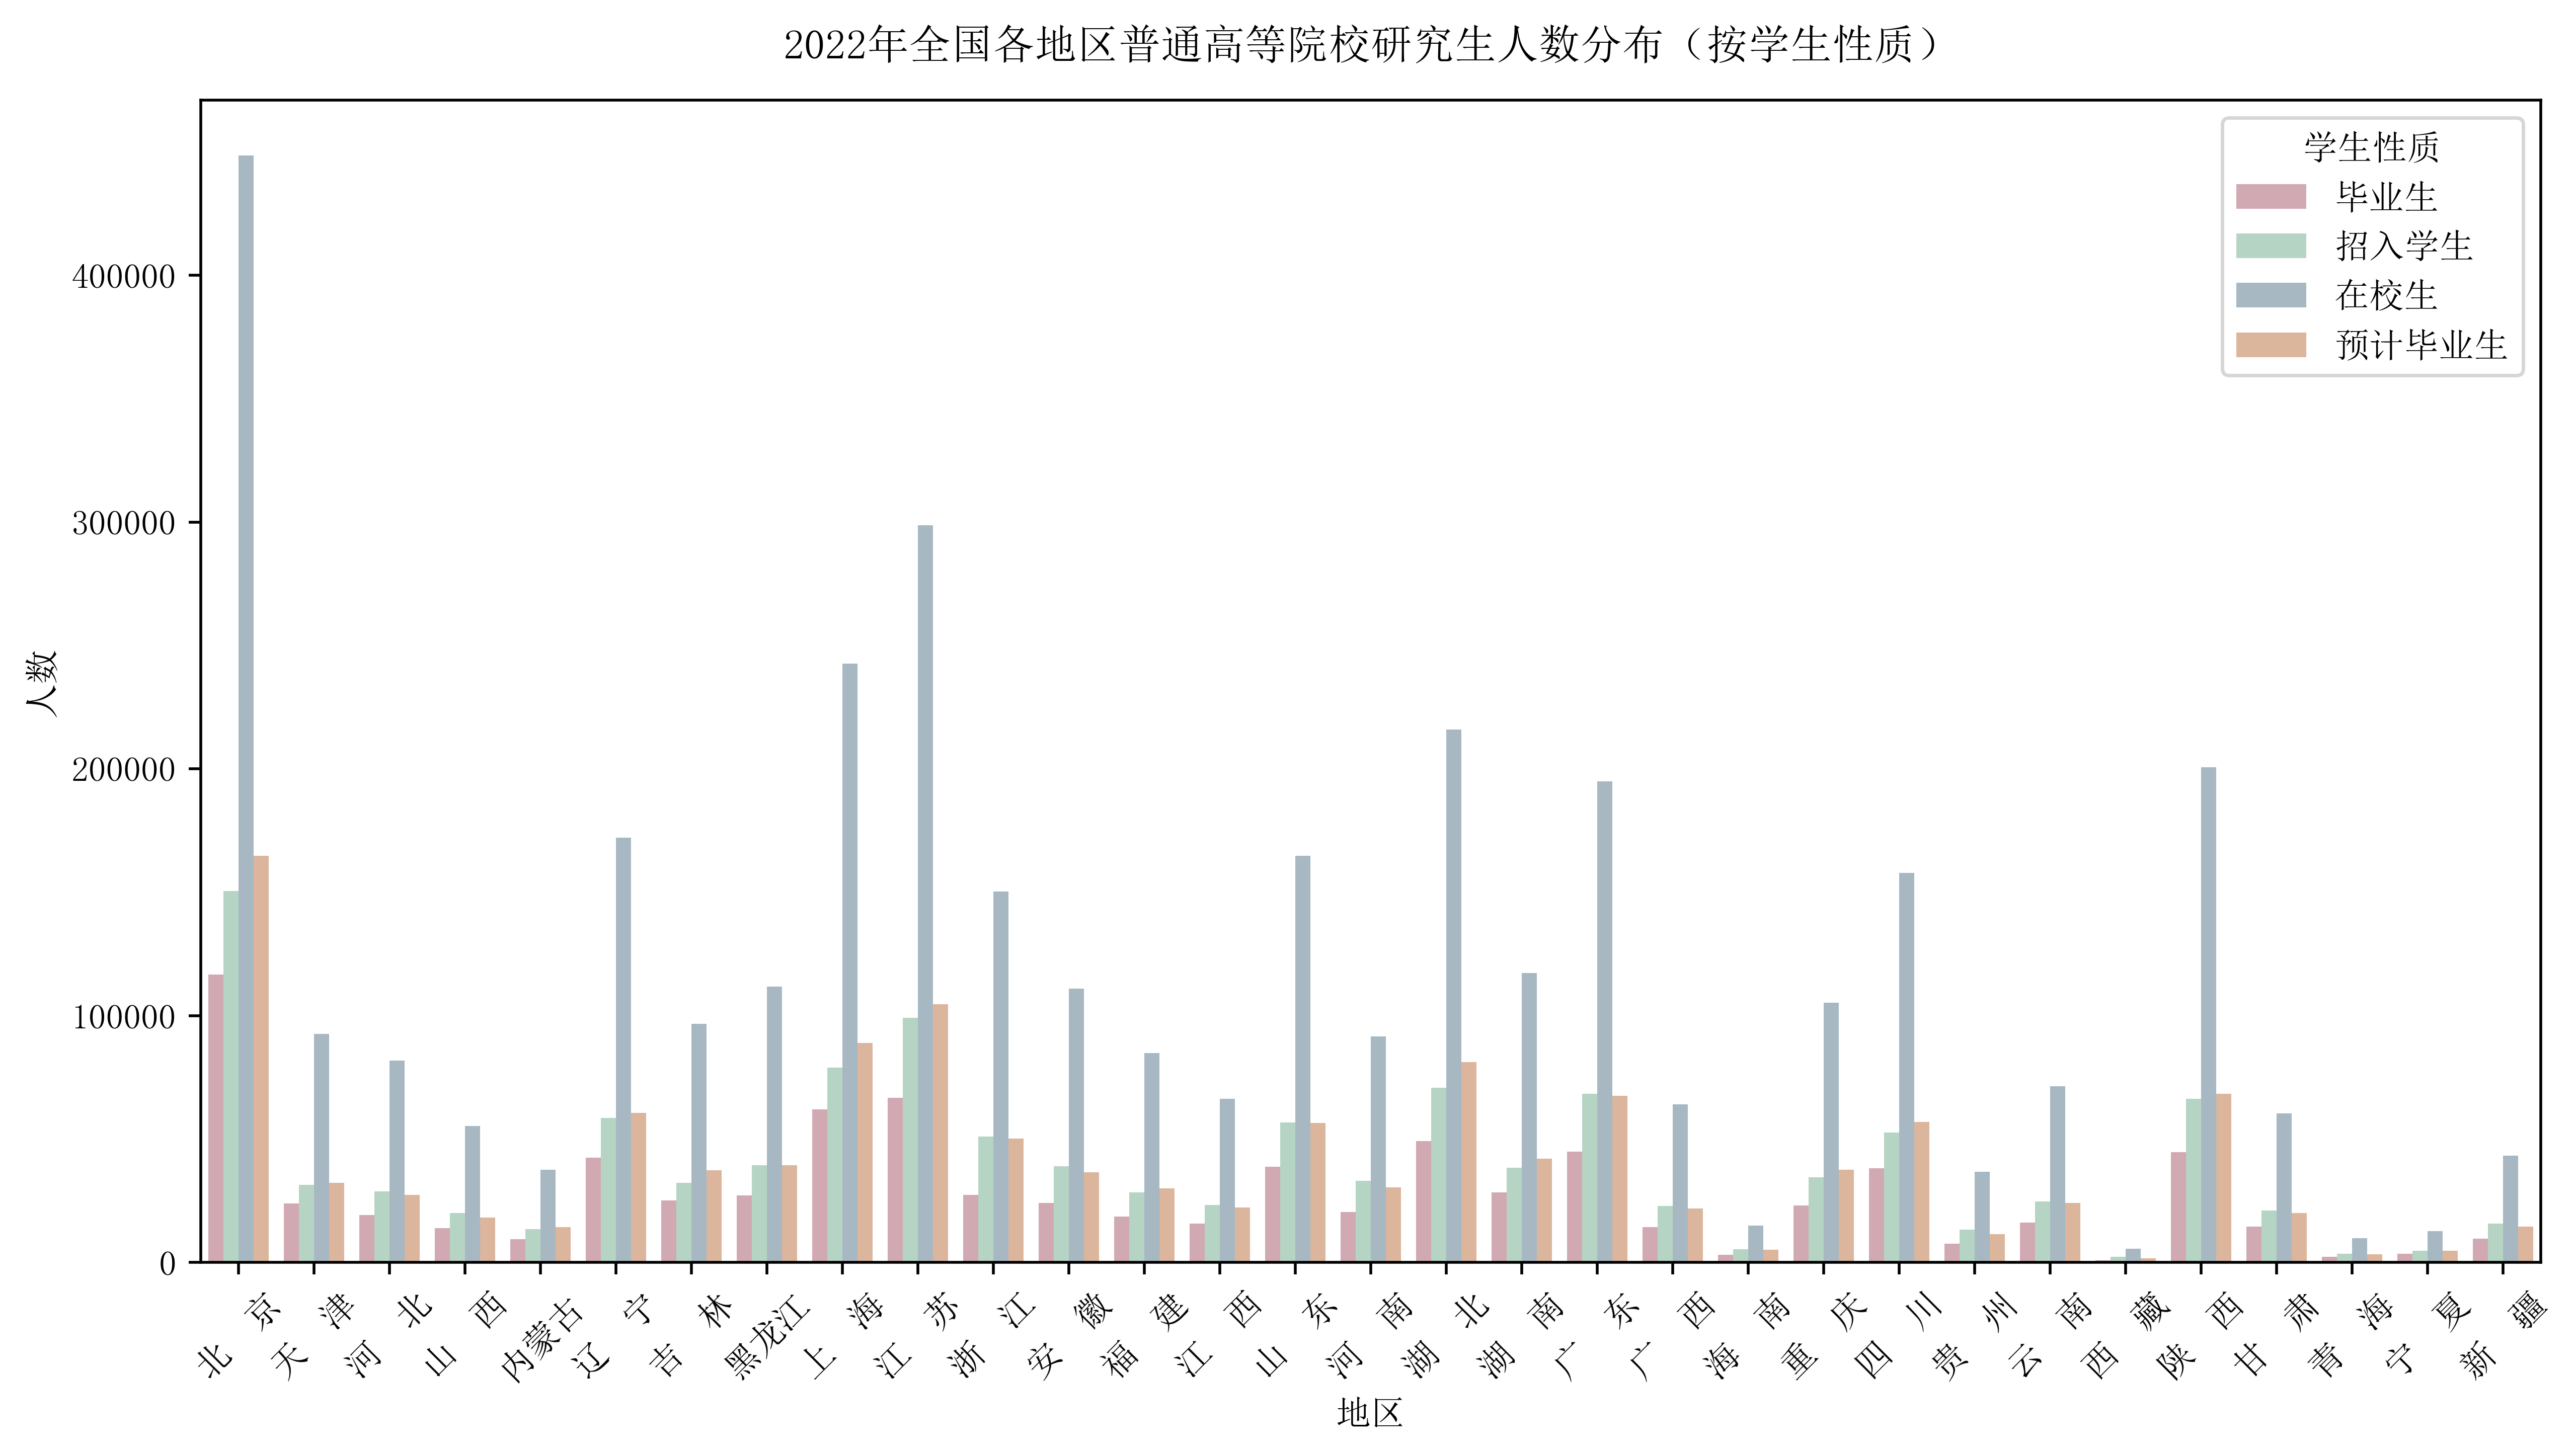

In [15]:
plt.figure(figsize = (12,6),dpi = 500)
color_map = {'毕业生':'#D8A2AE','招入学生':'#B1D9C3','在校生':'#A3B9C7','预计毕业生':'#E6B393'}
sns.barplot(master_state,x = '地区', y = '人数', hue = '学生性质',palette = color_map)
plt.xticks(rotation = 45)
plt.title('2022年全国各地区普通高等院校研究生人数分布（按学生性质）',pad = 12)
plt.ylabel('人数')
plt.show()

##### （2）描述性统计分析

         根据柱状图可知，北京普通高等院校的研究生规模最大（约45万人），该规模远远超出其他地区。其次是江苏、上海等东南沿海地区，再次是湖北、广东、辽宁等地。<br><br>西藏、海南、青海、宁夏、新疆等西部地区的研究生规模最小，西藏仅有约5600人。这可能是由于地区经济发展不平衡与教育资源的不平衡等原因导致的。
         此外，据图可知大部分省份的招入学生数略低于预计毕业生数（如北京、吉林、上海、江苏）等地，由此可以初步推测高校的研究生数量可能呈现下降的发展趋势。这可能是由于研究生缩招的政策原因和人口结构性问题。

#### 2.毕业生性别、学历层次可视化

##### （1）图形绘制

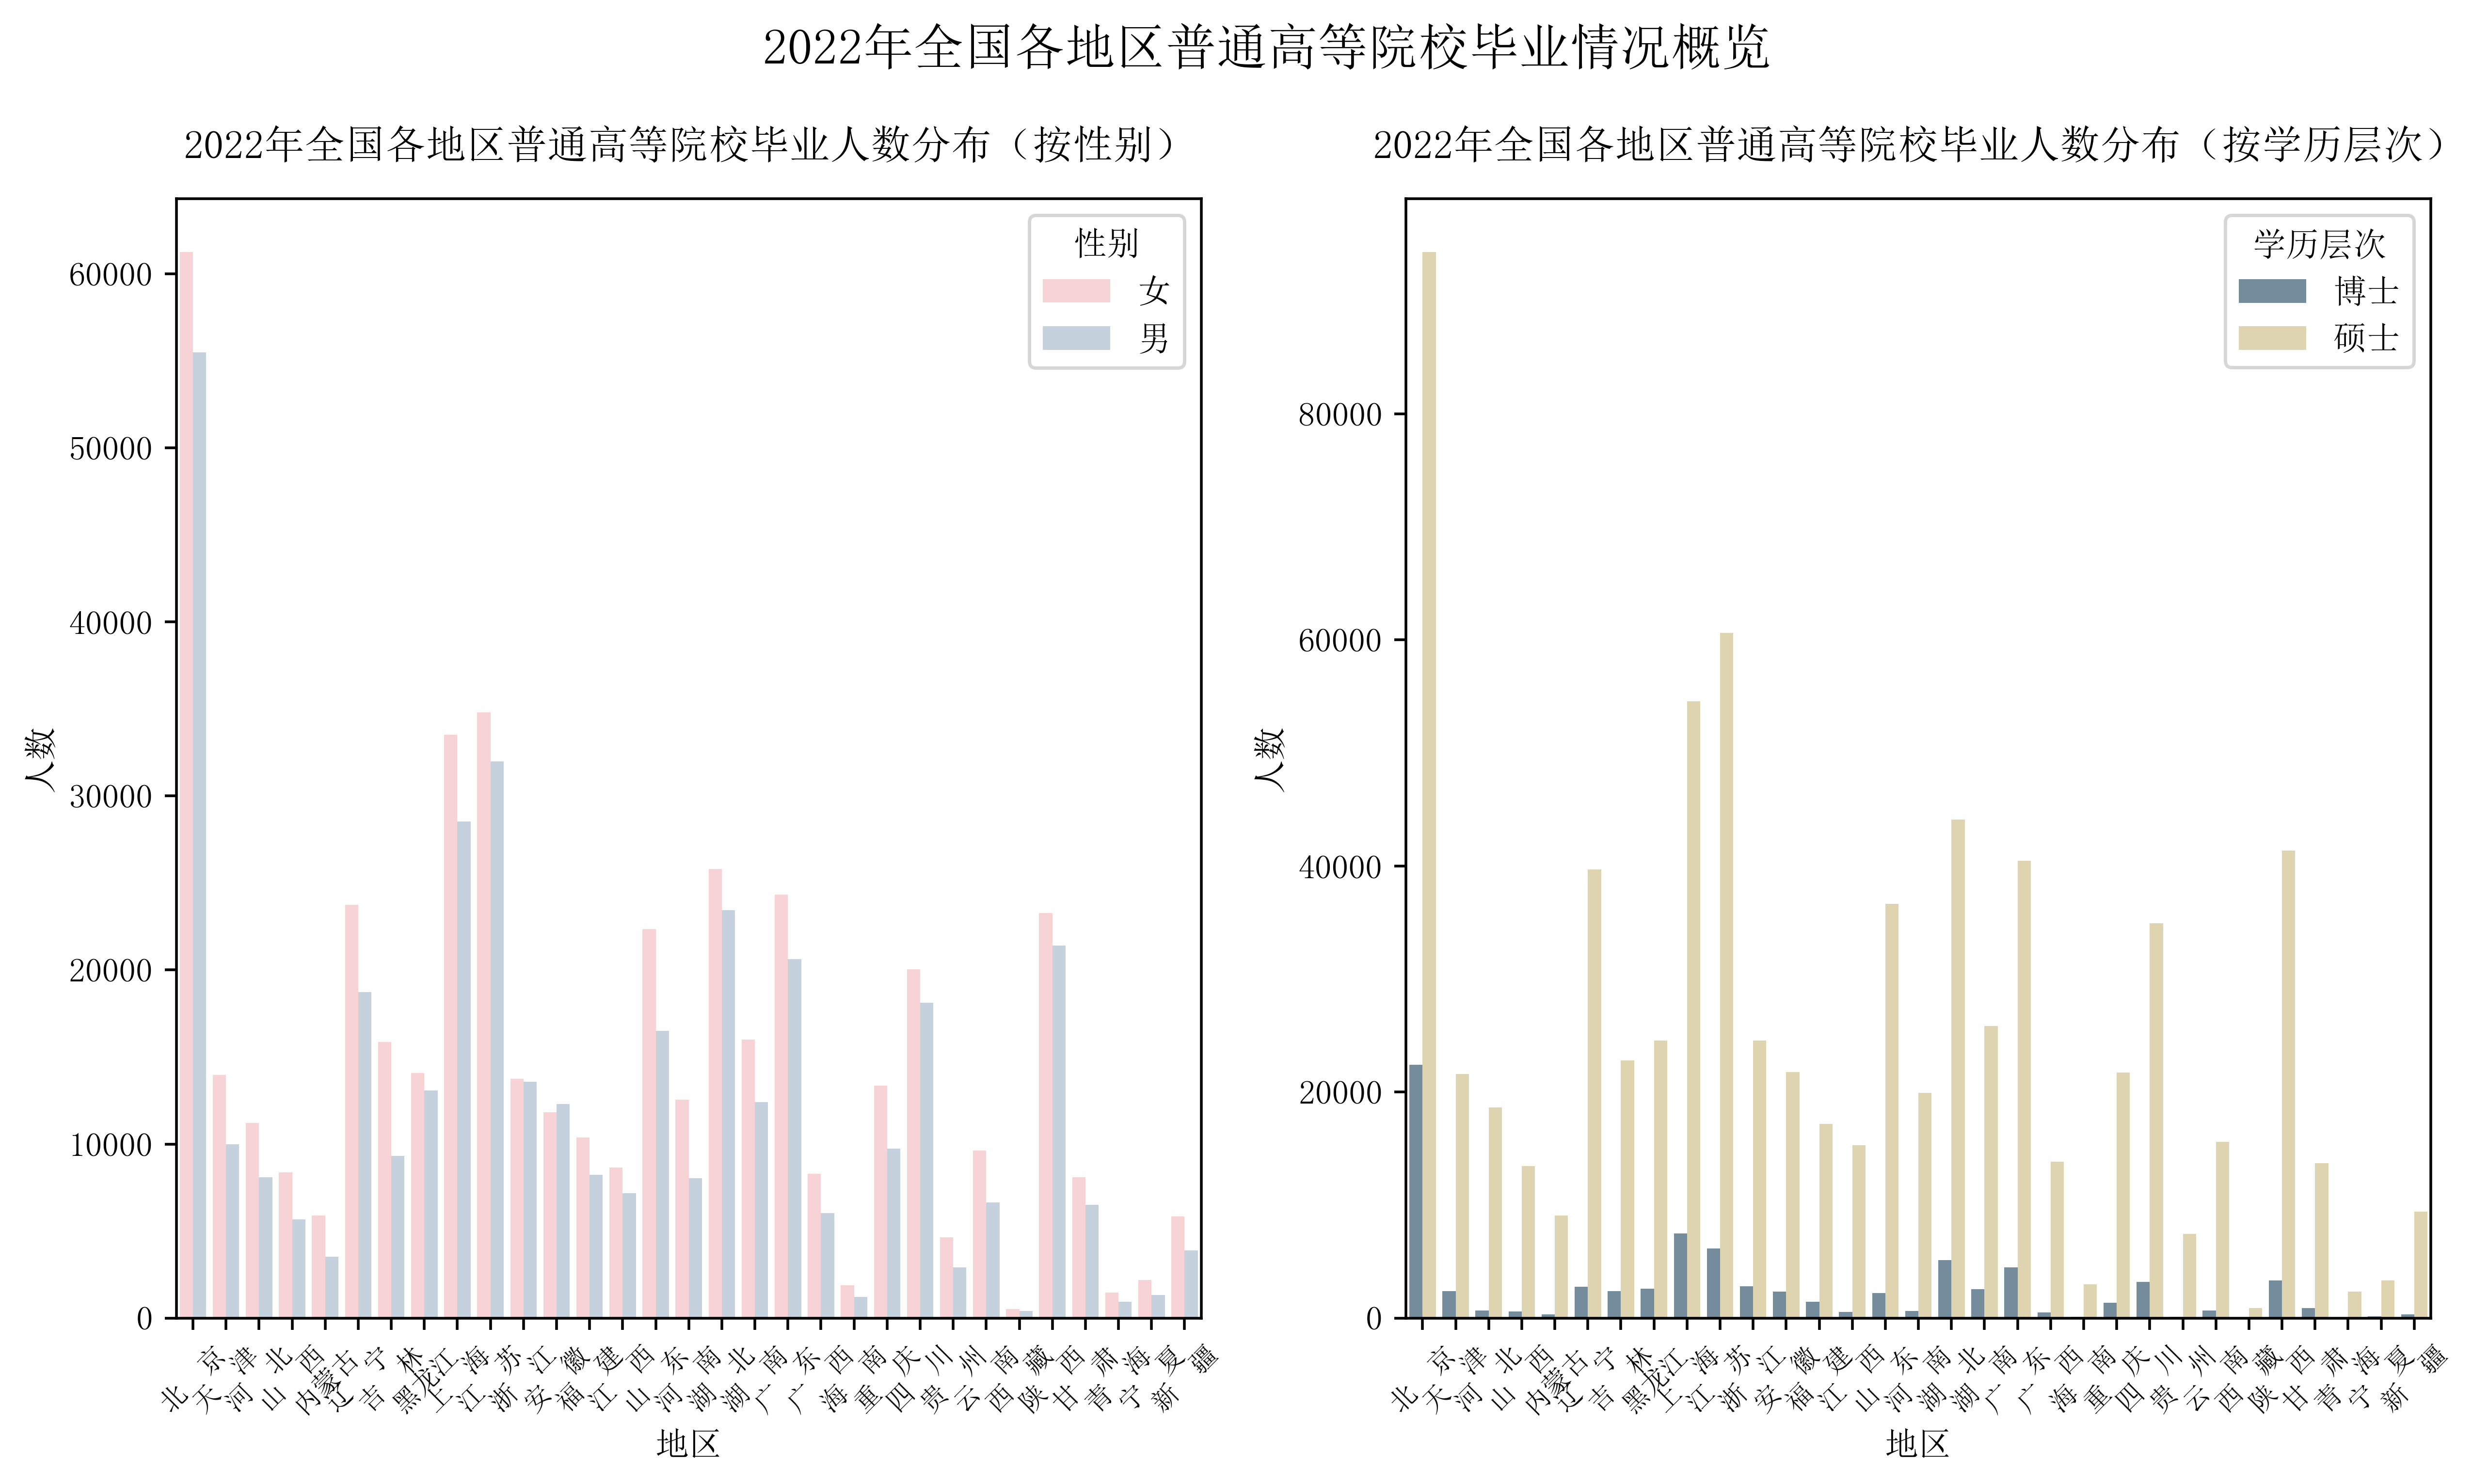

In [16]:
fig,axes = plt.subplots(1,2,figsize = (12,6),dpi = 500)
fig.suptitle('2022年全国各地区普通高等院校毕业情况概览', y=1,fontsize = 15)
# 毕业生性别可视化
axes_sex = sns.barplot(data = graduated_sex,x = '地区', y = '人数', hue = '性别',palette = {'女':'#fdcdd0','男':'#c1d1e1'},ax = axes[0])
axes_sex.set_title('2022年全国各地区普通高等院校毕业人数分布（按性别）', pad=12)
axes_sex.set_ylabel('人数')
axes_sex.set_xticks(range(len(graduated_sex['地区'].unique())))
axes_sex.set_xticklabels(axes_sex.get_xticklabels(), rotation=45,fontsize = 8)
# 毕业生学历层次可视化
axes_degree = sns.barplot(graduated_degree,x = '地区', y = '人数', hue = '学历层次',palette = {'博士':'#6D8EA2','硕士':'#E6D9A8'},ax = axes[1])
axes_degree.set_title('2022年全国各地区普通高等院校毕业人数分布（按学历层次）',pad = 12)
axes_degree.set_ylabel('人数')
axes_degree.set_xticks(range(len(graduated_sex['地区'].unique())))
axes_degree.set_xticklabels(axes_degree.get_xticklabels(), rotation=45,fontsize = 8)
plt.show()

##### （2）描述性统计分析

     据图可知，各地区的普通高校毕业研究生存在较明显的性别差异，女毕业生普遍多于男毕业生。
     高校的博士毕业人数远远低于硕士毕业人数，除了总人数的区别之外，或许还有“博士毕业更困难“的原因。但无法从图中进行直接判断，仍需更多的数据比对支持。

#### 3.招入学生性别、学历层次可视化

##### (1)图形绘制

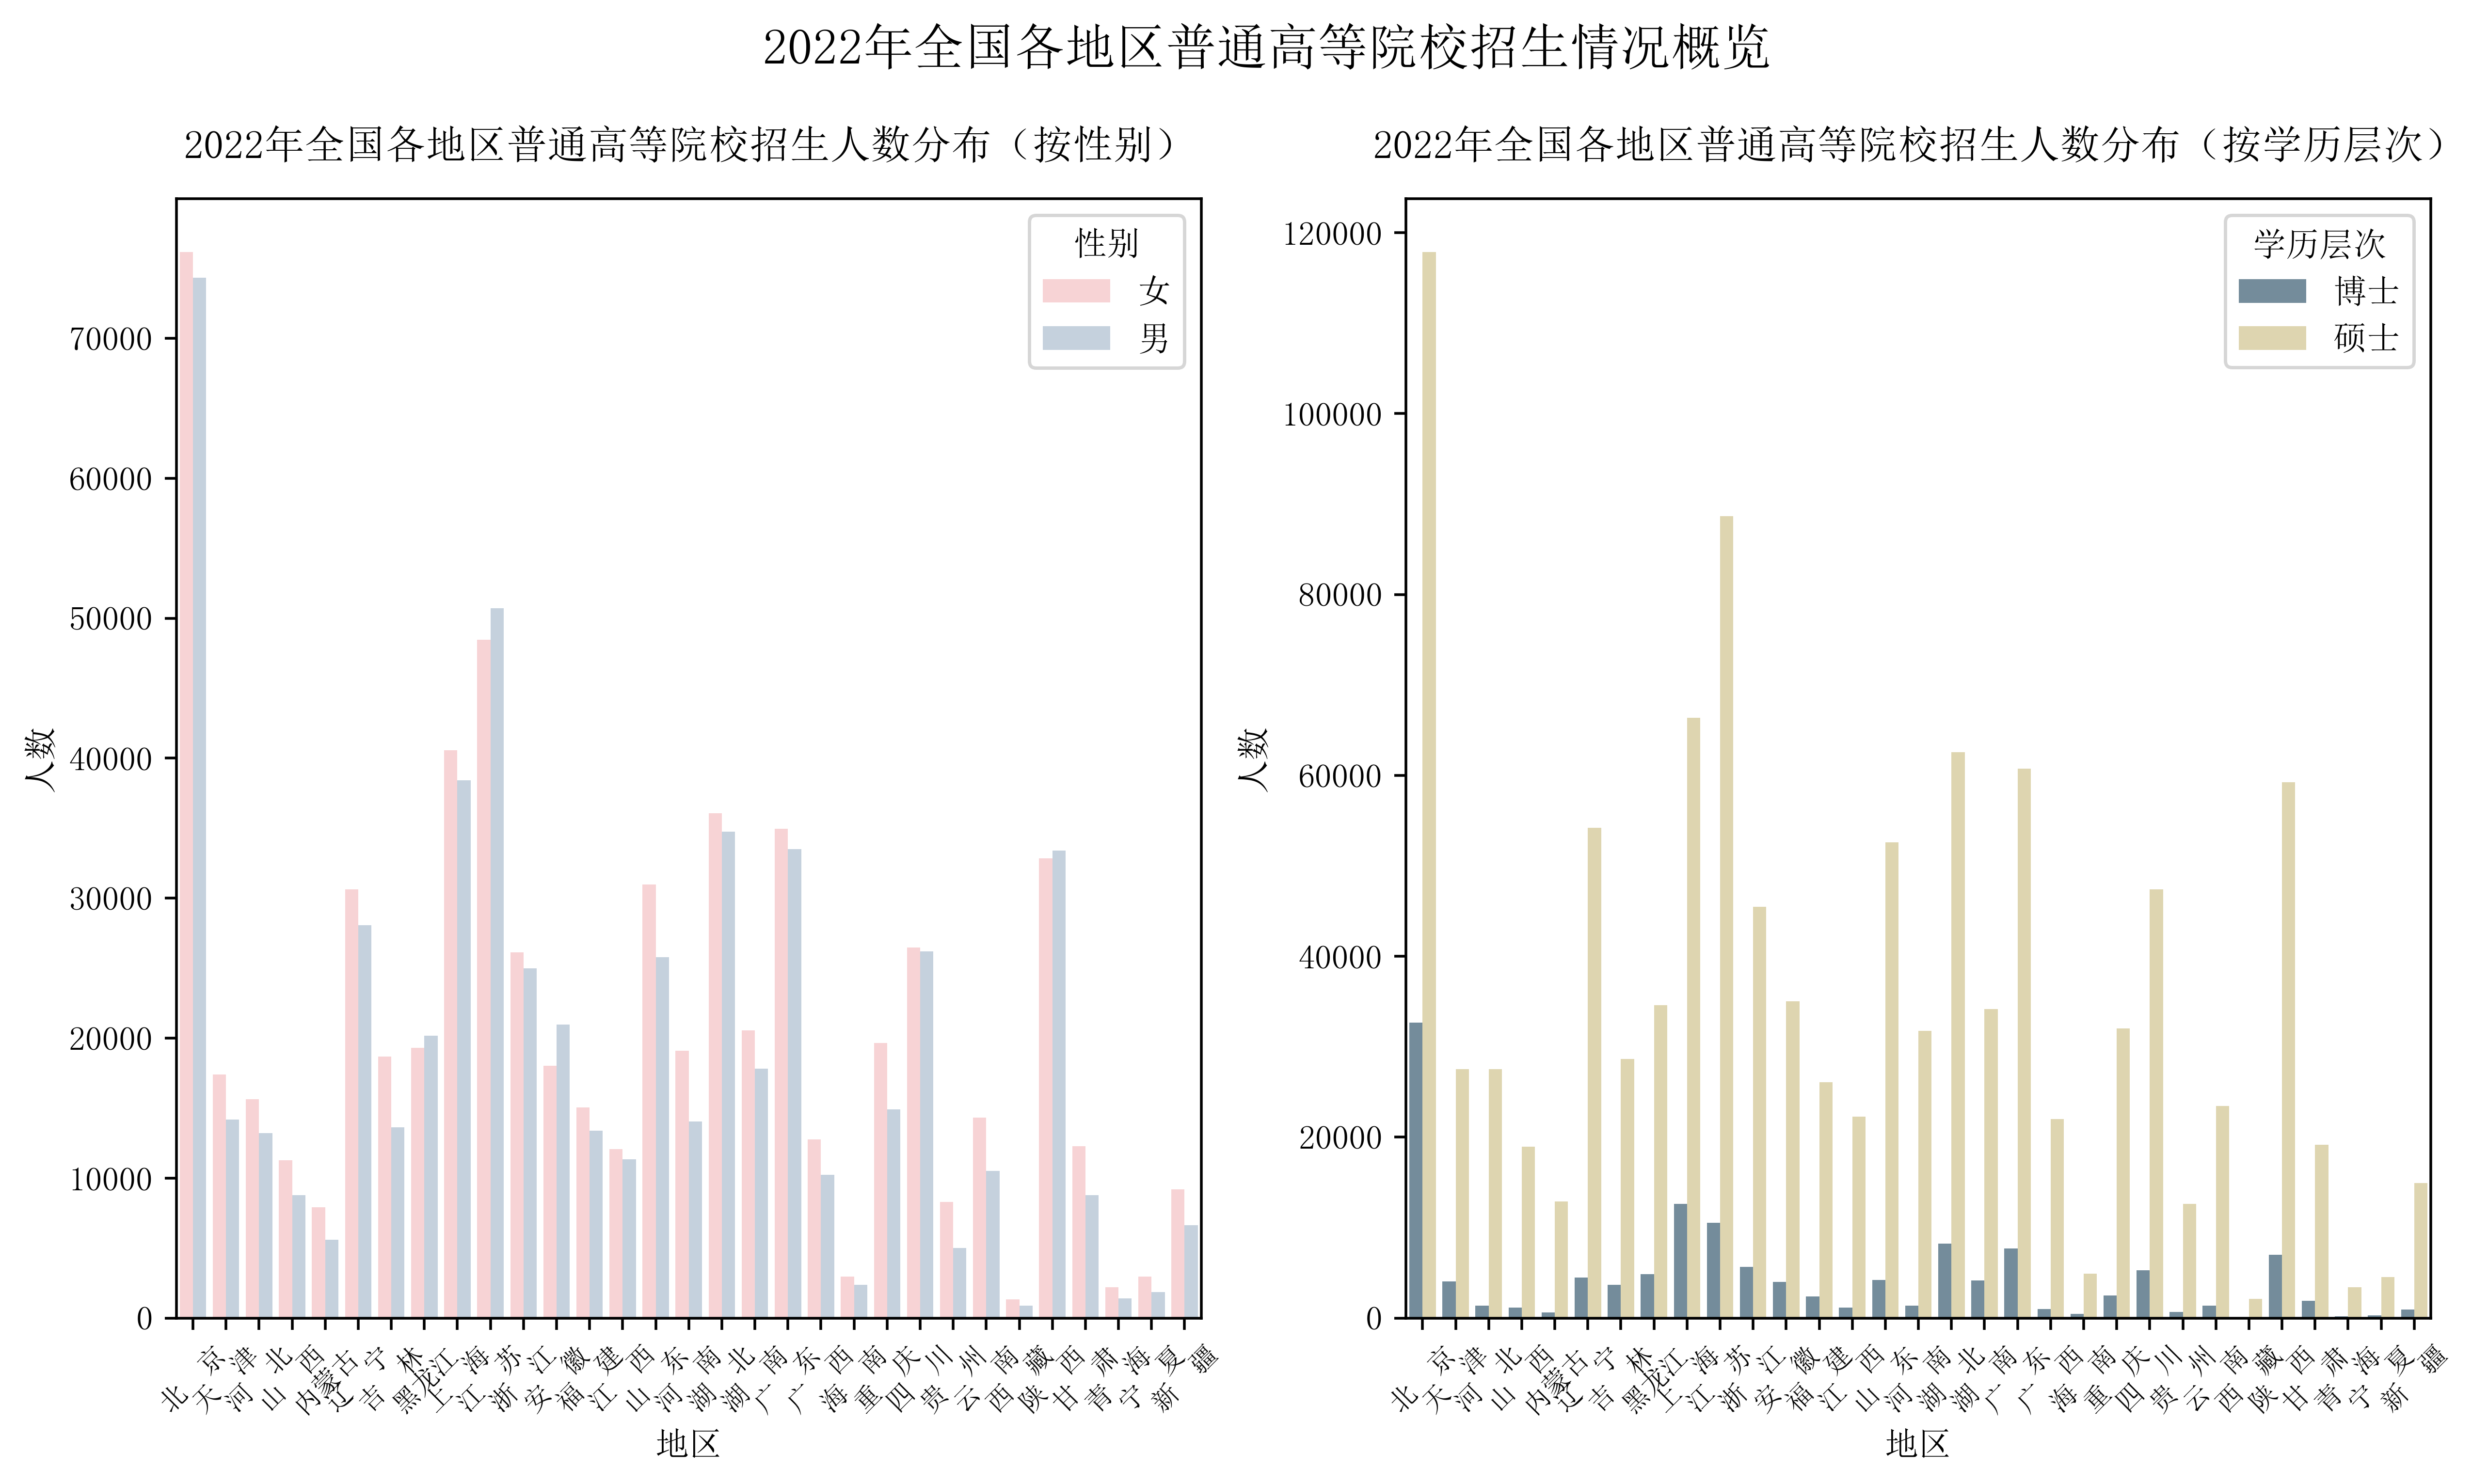

In [17]:
fig,axes = plt.subplots(1,2,figsize = (12,6),dpi = 500)
fig.suptitle('2022年全国各地区普通高等院校招生情况概览', y=1,fontsize = 15)
# 毕业生性别可视化
axes_sex = sns.barplot(data = enroll_sex,x = '地区', y = '人数', hue = '性别',palette = {'女':'#fdcdd0','男':'#c1d1e1'},ax = axes[0])
axes_sex.set_title('2022年全国各地区普通高等院校招生人数分布（按性别）', pad=12)
axes_sex.set_ylabel('人数')
axes_sex.set_xticks(range(len(graduated_sex['地区'].unique())))
axes_sex.set_xticklabels(axes_sex.get_xticklabels(), rotation=45,fontsize = 8)
# 毕业生学历层次可视化
axes_degree = sns.barplot(enroll_degree,x = '地区', y = '人数', hue = '学历层次',palette = {'博士':'#6D8EA2','硕士':'#E6D9A8'},ax = axes[1])
axes_degree.set_title('2022年全国各地区普通高等院校招生人数分布（按学历层次）',pad = 12)
axes_degree.set_ylabel('人数')
axes_degree.set_xticks(range(len(graduated_sex['地区'].unique())))
axes_degree.set_xticklabels(axes_degree.get_xticklabels(), rotation=45,fontsize = 8)
plt.show()

##### （2）描述性统计分析

##### 据图可知，除了北京、上海、浙江、西藏、吉林等少数地区招生性别男性多于女性，其他地区的女性均多于男性。<br><br>可以初步推断：当今女性更多地进入了高等教育领域，但是在北京、上海等高校资源较为发达且名校众多的地区，男性考生仍有优势。（仍需进一步数据支持和比对）

#### 4.在校学生性别、学历层次可视化

##### （1）图形绘制

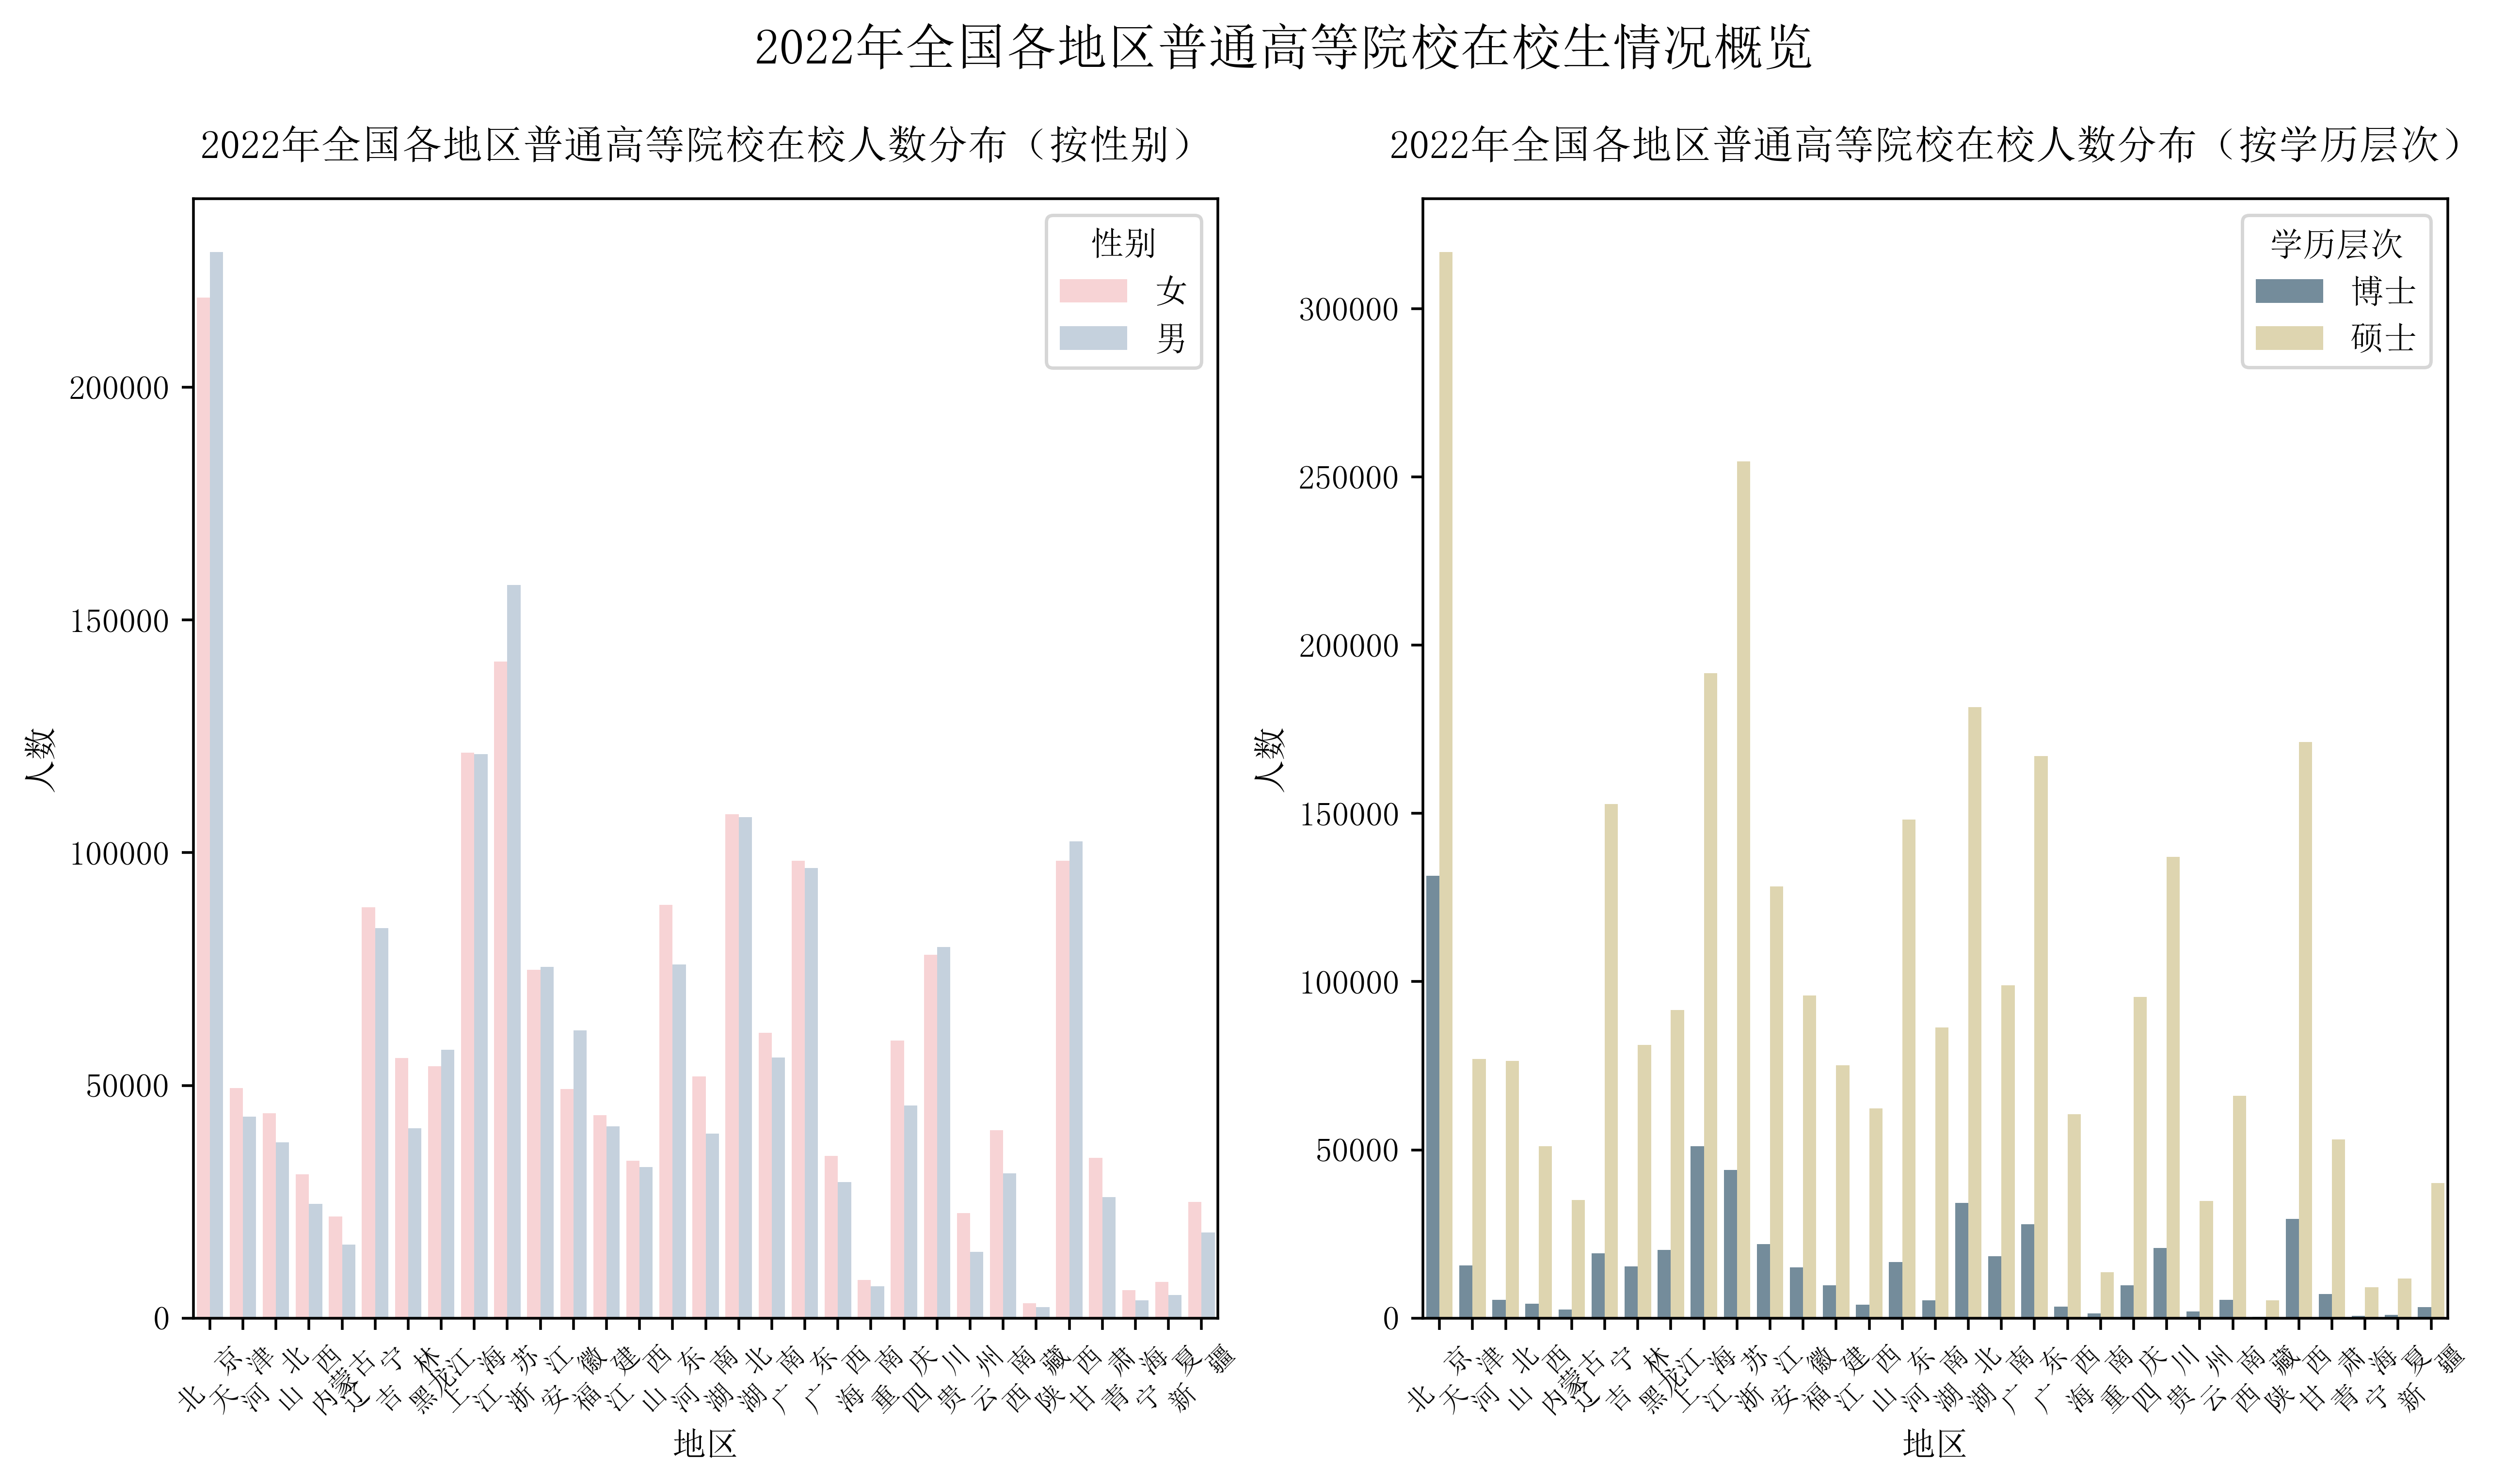

In [18]:
fig,axes = plt.subplots(1,2,figsize = (12,6),dpi = 500)
fig.suptitle('2022年全国各地区普通高等院校在校生情况概览', y=1,fontsize = 15)
# 毕业生性别可视化
axes_sex = sns.barplot(data = in_sex,x = '地区', y = '人数', hue = '性别',palette = {'女':'#fdcdd0','男':'#c1d1e1'},ax = axes[0])
axes_sex.set_title('2022年全国各地区普通高等院校在校人数分布（按性别）', pad=12)
axes_sex.set_ylabel('人数')
axes_sex.set_xticks(range(len(graduated_sex['地区'].unique())))
axes_sex.set_xticklabels(axes_sex.get_xticklabels(), rotation=45,fontsize = 8)
# 毕业生学历层次可视化
axes_degree = sns.barplot(in_degree,x = '地区', y = '人数', hue = '学历层次',palette = {'博士':'#6D8EA2','硕士':'#E6D9A8'},ax = axes[1])
axes_degree.set_title('2022年全国各地区普通高等院校在校人数分布（按学历层次）',pad = 12)
axes_degree.set_ylabel('人数')
axes_degree.set_xticks(range(len(graduated_sex['地区'].unique())))
axes_degree.set_xticklabels(axes_degree.get_xticklabels(), rotation=45,fontsize = 8)
plt.show()

##### （2）描述性统计分析

##### 根据上图《在校人数分布（按性别）》可知，2022年在校研究生女性也普遍多于男性，可推断女性进入高等教育领域这一渐进性的过程在更早的时间就已开始。

#### 5.预计毕业生性别、学历层次可视化

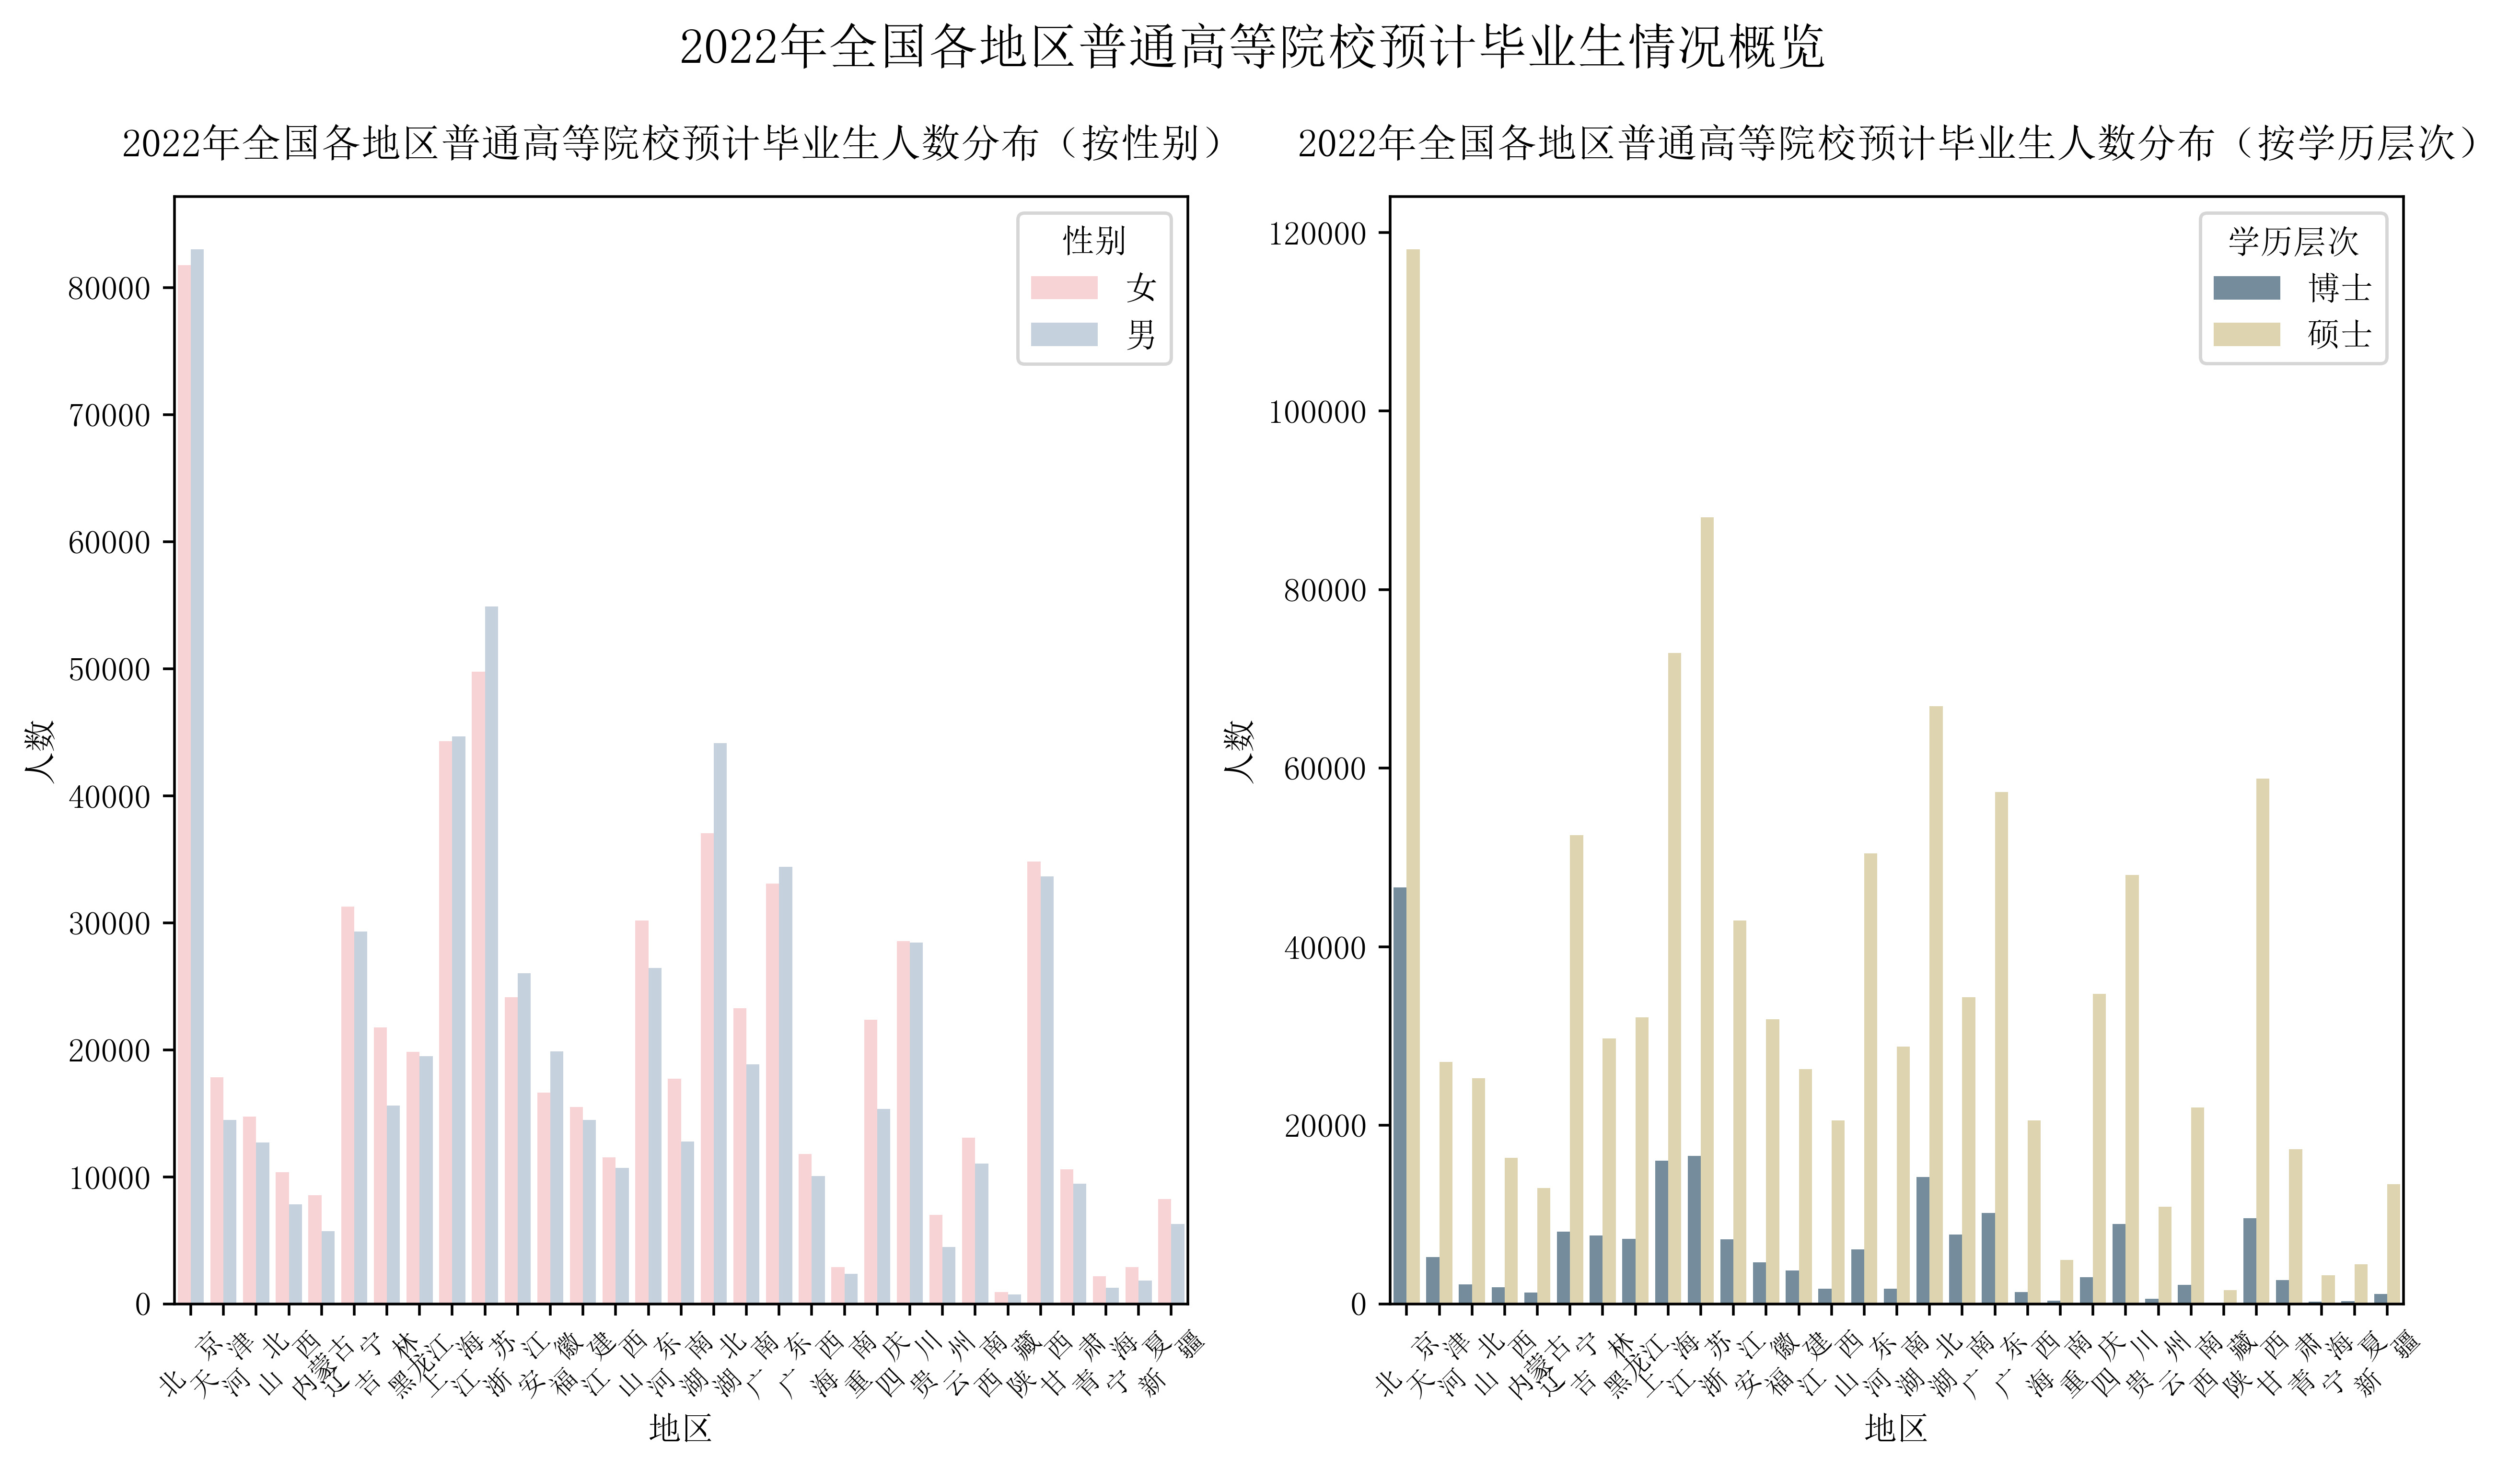

In [19]:
fig,axes = plt.subplots(1,2,figsize = (12,6),dpi = 500)
fig.suptitle('2022年全国各地区普通高等院校预计毕业生情况概览', y=1,fontsize = 15)
# 毕业生性别可视化
axes_sex = sns.barplot(data = undergraduated_sex,x = '地区', y = '人数', hue = '性别',palette = {'女':'#fdcdd0','男':'#c1d1e1'},ax = axes[0])
axes_sex.set_title('2022年全国各地区普通高等院校预计毕业生人数分布（按性别）', pad=12)
axes_sex.set_ylabel('人数')
axes_sex.set_xticks(range(len(graduated_sex['地区'].unique())))
axes_sex.set_xticklabels(axes_sex.get_xticklabels(), rotation=45,fontsize = 8)
# 毕业生学历层次可视化
axes_degree = sns.barplot(undergraduated_degree,x = '地区', y = '人数', hue = '学历层次',palette = {'博士':'#6D8EA2','硕士':'#E6D9A8'},ax = axes[1])
axes_degree.set_title('2022年全国各地区普通高等院校预计毕业生人数分布（按学历层次）',pad = 12)
axes_degree.set_ylabel('人数')
axes_degree.set_xticks(range(len(graduated_sex['地区'].unique())))
axes_degree.set_xticklabels(axes_degree.get_xticklabels(), rotation=45,fontsize = 8)
plt.show()

### （三）假设检验

#### 1.提出假设

#### 根据上一阶段的数据可视化结果，此处提出以下具有讨论价值的假设，并应用合适的方法验证假设

H1：全国范围内的研究生招生数存在显著的性别差异

H2：全国范围内的在校研究生数存在显著的性别差异

#### 2.验证假设

（1）检验H1：全国范围内的研究生招生人数是否存在显著的性别差异

In [26]:
from scipy.stats import ttest_ind

In [28]:
t_stat,p_value = ttest_ind(enroll_sex[enroll_sex['性别'] == '女']['人数'],enroll_sex[enroll_sex['性别'] == '男']['人数'])

In [30]:
f'{t_stat:3f}'

'0.469807'

In [31]:
f'{p_value:3f}'

'0.640196'

    由上述检验可知，当前没有足够的证据证明全国范围内的招生人数存在显著的性别差异

(2)检验H2：全国范围内的在校研究生数是否存在显著的性别差异

In [32]:
t_stat,p_value = ttest_ind(in_sex[in_sex['性别'] == '女']['人数'],in_sex[in_sex['性别'] == '男']['人数'])

In [33]:
f'{t_stat:3f}'

'0.243911'

In [34]:
f'{p_value:3f}'

'0.808132'

    由上述检验可知，当前没有足够的证据证明全国范围内的在校人数存在显著的性别差异

## 五、结论

    由于数据的变异性较大，或者多因素的影响，假设检验并未得出预期的结果，与从可视化图像中可以观察到的趋势不一致。但这并不能否认女性在高等教育中的比重越来越大，想要得出更加客观精确的结论，依然需要更多数据的支持，并运用更多其他统计方法的分析。